# Install and Import Packages

In [1]:
# Importing Libraries

In [2]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install json-tricks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit


import numpy as np
import os
from json_tricks import dump, load

from pydub import AudioSegment, effects
import librosa
import noisereduce as nr

import tensorflow as tf
import keras
import sklearn

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import time
tic = time.perf_counter()
import IPython.display as ipd


# Dataset 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Crema = "/content/drive/MyDrive/datasets/speech/CREMAD/sample/"
#Crema = "/content/drive/MyDrive/datasets/speech/CREMAD/AudioWAV/"
Ravdess = "/content/drive/MyDrive/datasets/speech/RAVDESS/data"
Ravdess_processed = "/content/drive/MyDrive/datasets/speech/RAVDESS/processedData/"
Ravdess_speech_sample = "/content/drive/MyDrive/datasets/speech/RAVDESS/data/Audio_Speech_Actors_01-24/"
df_path = "/content/drive/MyDrive/datasets/speech/RAVDESS/ravdess_df.csv"

In [8]:
# 'emotions' list fix for classification purposes:
#     Classification values start from 0, Thus an 'n = n-1' operation has been executed for both RAVDESS and TESS databases:
def emotionencode(e_num):
    if e_num == "01":   return 0 # neutral
    elif e_num == "02": return 1 # calm
    elif e_num == "03": return 2 # happy
    elif e_num == "04": return 3 # sad
    elif e_num == "05": return 4 # angry
    elif e_num == "06": return 5 # fear
    elif e_num == "07": return 6 # disgust
    else:               return 7 # suprised

def emotion_label(e):
  labels = ["neutral", "calm", "happy", "sad", "angry", "fear", "disgust", "suprised"]
  if e < 7:
    return labels[e]
  else:
    return labels[-1]

In [9]:
labels = ["neutral", "calm", "happy", "sad", "angry", "fear", "disgust", "suprised"]
labels

['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'suprised']

In [10]:
 os.walk(Ravdess)

<generator object walk at 0x7f2d538ca1d0>

# Visualization

In [12]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 



#e = emotionencode(e_num)
#labels[e]
#X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
#mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# Audio waveplot
def create_waveplot(path):
    e_num = path[len(Ravdess_speech_sample + actor) +  + 6: len(Ravdess_speech_sample + actor) + 8]
    e = labels[emotionencode(e_num)]
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion audio sampled at 44100 hrz'.format(e), size=15)
    librosa.display.waveplot(X, sr= sample_rate)
    plt.show()



# Spectogram
def create_spectogram(path):
    e_num = path[len(Ravdess_speech_sample + actor) +  + 6: len(Ravdess_speech_sample + actor) + 8]
    e = labels[emotionencode(e_num)]
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
    X = librosa.stft(X)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')   
    plt.colorbar()


# MFCC Plot
def mfcc_plot(path):
    e_num = path[len(Ravdess_speech_sample + actor) +  + 6: len(Ravdess_speech_sample + actor) + 8]
    e = labels[emotionencode(e_num)]
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    plt.figure(figsize=(20, 15))
    plt.subplot(3,1,1)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.title('mfcc plot for {} emotion audio'.format(e), size=15)
    plt.ylabel('MFCC')
    plt.colorbar()
    plt.show()



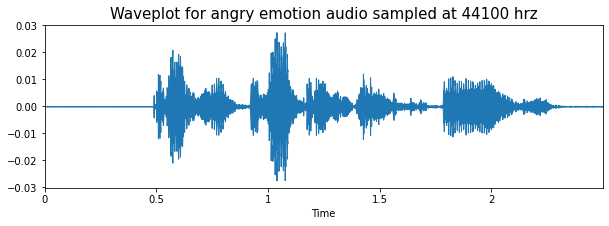

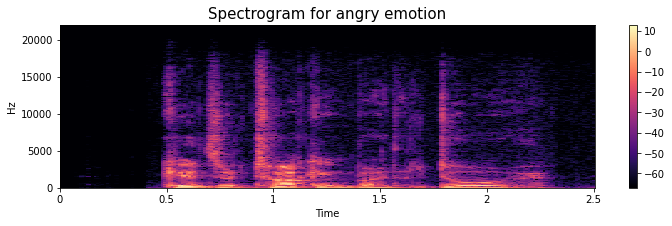

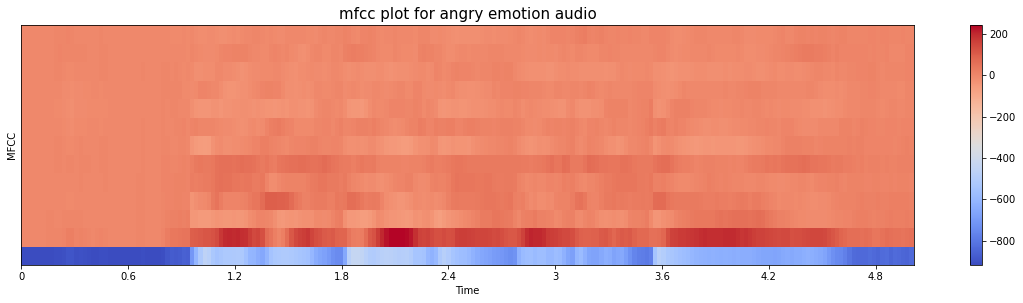

In [13]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
actor = "Actor_09/"
sample = "03-01-05-01-01-01-09.wav"
path = Ravdess_speech_sample + actor + sample
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

create_waveplot(path)
create_spectogram(path)
mfcc_plot(path)

ipd.Audio(path)
ipd.Audio(path)

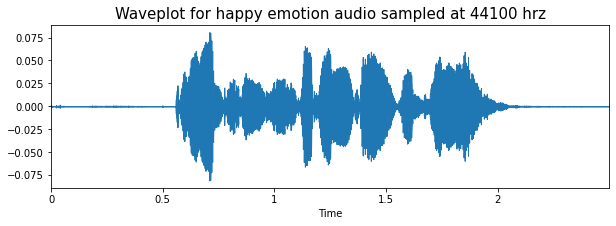

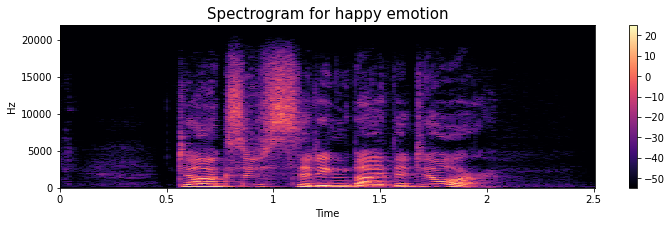

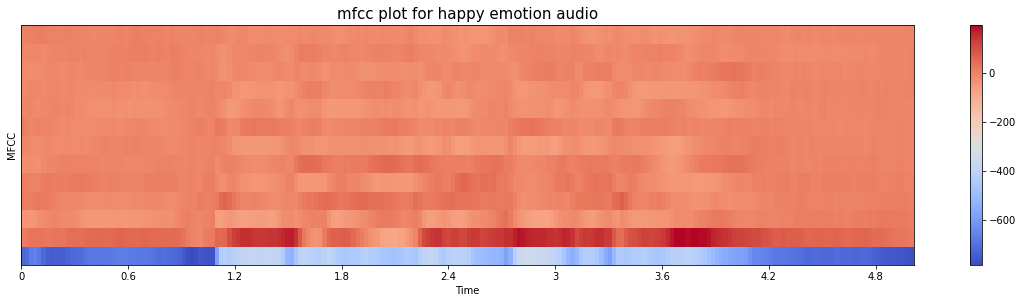

In [14]:
# Source - RAVDESS; Gender - Female; Emotion - Happy 
actor = "Actor_12/"
sample = "03-01-03-01-02-01-12.wav"
path = Ravdess_speech_sample + actor + sample
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

create_waveplot(path)
create_spectogram(path)
mfcc_plot(path)
ipd.Audio(path)

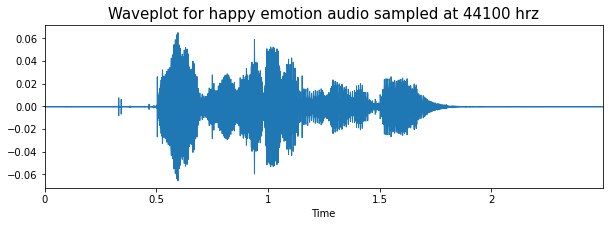

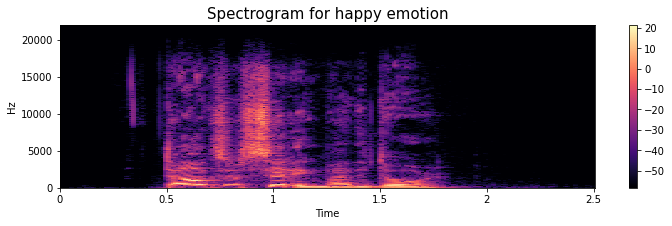

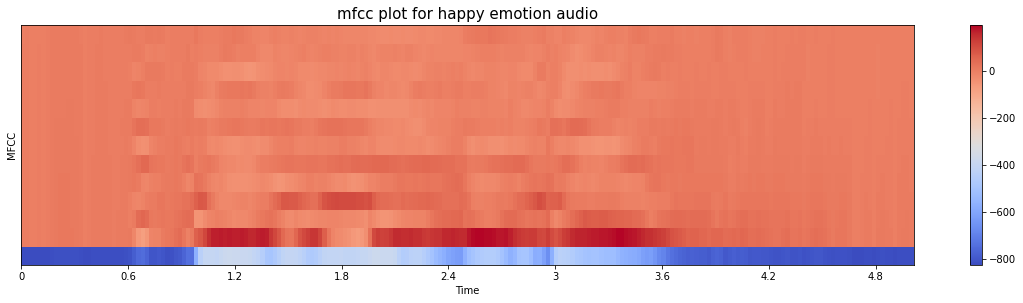

In [15]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
actor = "Actor_11/"
sample = "03-01-03-01-02-02-11.wav"
path = Ravdess_speech_sample + actor + sample
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

create_waveplot(path)
create_spectogram(path)
mfcc_plot(path)
ipd.Audio(path)

216
216


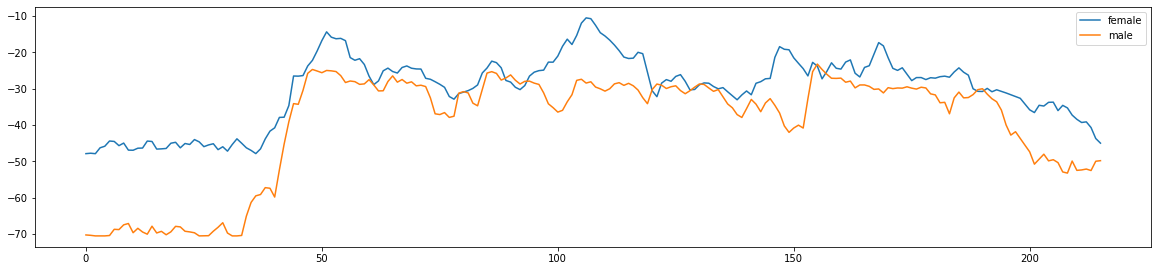

In [16]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = Ravdess_speech_sample + "Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = Ravdess_speech_sample + "Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


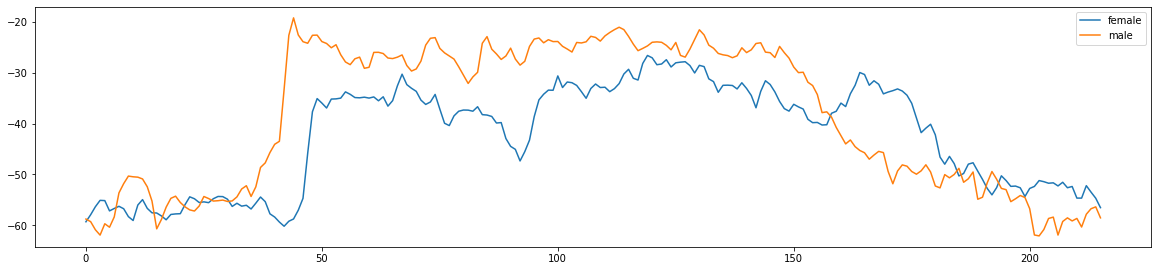

In [17]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = Ravdess_speech_sample + "Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = Ravdess_speech_sample + "Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

# Processing

## Processing on one file as example

### Loading The Audio

In [18]:
# Define file path for a single file.
sample_path = Ravdess_speech_sample + "Actor_02/03-01-01-01-01-01-02.wav"

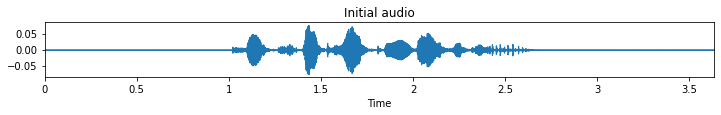

In [19]:
# 1. Load the audio file into an 'AudioSegment' object, and extract the sample rate. 
#    'x' is an array of samples that is only relevant for visualization at this part.

rawsound = AudioSegment.from_file(sample_path )
x, sr = librosa.load(sample_path , sr = None)

plt.figure(figsize=(12,1))
librosa.display.waveplot(x, sr)
plt.title('Initial audio')

rawsound

### Normalize to +5.0 dBFS and transform to an array

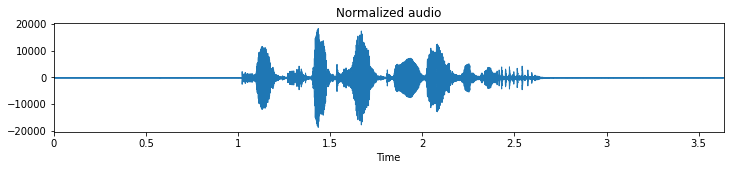

In [20]:
# 2. Normalize to +5.0 dBFS, Transform audio signals to an array.

normalizedsound = effects.normalize(rawsound, headroom = 5.0) 
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')

plt.figure(figsize=(12,2))
librosa.display.waveplot(normal_x, sr)
plt.title('Normalized audio')

normalizedsound

### Trim Silence from the beginning and the end

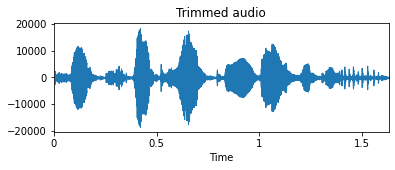

In [21]:
# 3. Trim silence in the beginning and end.

xt, index = librosa.effects.trim(normal_x, top_db = 30)

plt.figure(figsize=(6,2))
librosa.display.waveplot(xt, sr)
plt.title('Trimmed audio')

ipd.display(ipd.Audio(data = xt, rate=sr))

### Padding for having equal lenth

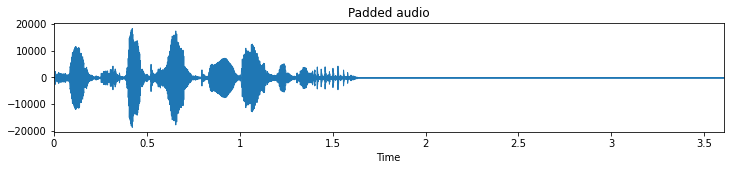

In [22]:
# 4. Right-side padding for length equalization.
#    173056 = maximum lengthed audio (the maximum length is derived later)

padded_x = np.pad(xt, (0, 173056-len(xt)), 'constant')

plt.figure(figsize=(12,2))
librosa.display.waveplot(padded_x, sr)
plt.title('Padded audio')

ipd.display(ipd.Audio(data = padded_x, rate=sr))

### Noise Reduction

Note: although there is no noise to reduce from RAVDESS nor TESS databases, reduce_noise function by noisereduce library attributes a uniform stamper to the audio files.

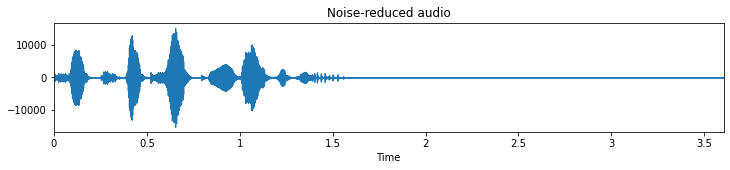

In [23]:
# 5. Noise reduction
 

final_x = nr.reduce_noise(padded_x, sr = sr)



plt.figure(figsize=(12,2))
librosa.display.waveplot(final_x, sr)
plt.title('Noise-reduced audio')

ipd.display(ipd.Audio(data = final_x, rate=sr))

## Understanding Shapes of Files and Find the Padding Method

In [24]:
# Sample of padding
i = 0
frame_length = 2048
total_length = 267264 
hop_length = 512
raw_folder_path = Ravdess

for subdir, dirs, files in os.walk(raw_folder_path):
  for file in files: 
        if (i < 20):
          current_path = os.path.join(subdir,file)
          # Fetch the sample rate.
          _, sr = librosa.load(path = current_path, sr = None) # sr (the sample rate) is used for librosa's MFCCs. '_' is irrelevant.
          # Load raw file
          rawsound = AudioSegment.from_file(current_path) 
          # Normalize the audio to +5.0 dBFS.
          normalizedsound = effects.normalize(rawsound, headroom = 0) 
          # Transform the normalized audio to np.array of samples.
          normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')
          # Trim silence from the beginning and the end.
          xt, index = librosa.effects.trim(normal_x, top_db=30)
          # Print raw file's shape
          print(f"original file: {xt},\n raw shape = {xt.shape}\n")
          padded_np = np.pad(xt, (0, total_length-len(xt)), 'constant')
          padded_keras = pad_sequences([xt], maxlen = total_length, padding='post', truncating='post', dtype='float32', value=0.0).reshape(-1,)
          # Ensuring both padding methods yield same values
          print(np.array_equal(padded_np,padded_keras))

          # noise reduce
          final_x = nr.reduce_noise(padded_keras, sr=sr)
          
          f1 = librosa.feature.mfcc(final_x, sr=sr, n_mfcc=13, hop_length = hop_length) # MFCC
          e_num = file[6:8] 
          e = emotionencode(e_num)
          emotion = emotion_label(e)
          # Print path of file
          print(current_path)
          # Print emotion and label
          print(f"label and emotion: {e}, {emotion}")

          # Print padded and shape for understanding purpose
          print(f"numpy padded file: {padded_np},\n numpy padded shape = {padded_np.shape}")
          
          print(f"keras padded file: {padded_keras},\n keras padded shape = {padded_keras.shape}")
          print(f"final_x shape: {final_x.shape}") 
          print(f"feature shape: {f1.shape}\n\n\n")
          
          i += 1


original file: [  0.   0.   0. ... 440. 440. 385.],
 raw shape = (86016,)

True
/content/drive/MyDrive/datasets/speech/RAVDESS/data/Audio_Speech_Actors_01-24/Actor_18/03-01-01-01-01-01-18.wav
label and emotion: 0, neutral
numpy padded file: [0. 0. 0. ... 0. 0. 0.],
 numpy padded shape = (267264,)
keras padded file: [0. 0. 0. ... 0. 0. 0.],
 keras padded shape = (267264,)
final_x shape: (267264,)
feature shape: (13, 523)



original file: [   0.   50.  101. ... -304. -254. -304.],
 raw shape = (76288,)

True
/content/drive/MyDrive/datasets/speech/RAVDESS/data/Audio_Speech_Actors_01-24/Actor_18/03-01-01-01-02-01-18.wav
label and emotion: 0, neutral
numpy padded file: [  0.  50. 101. ...   0.   0.   0.],
 numpy padded shape = (267264,)
keras padded file: [  0.  50. 101. ...   0.   0.   0.],
 keras padded shape = (267264,)
final_x shape: (267264,)
feature shape: (13, 523)



original file: [  0. -49. -49. ... 145. 145. 193.],
 raw shape = (79360,)

True
/content/drive/MyDrive/datasets/spee

## Create DataFrame of Paths and Emotions (Labels)

In [27]:
# Create dataframe from paths and emotions (labels)

file_emotion = []
file_label = []
file_path = []

for subdir, dirs, files in os.walk(Ravdess):
  for file in files: 
    file_path.append(Ravdess + "/" + file)
    loc = Ravdess + file
    # storing file emotions
    e_num = loc[len(Ravdess) + 6: len(Ravdess) + 8] 
    e = emotionencode(e_num)
    file_label.append(e)
    file_emotion.append(emotion_label(e))


# dataframe for emotion of files
label_df = pd.DataFrame(file_emotion, columns=['emotion'])
        
# dataframe for emotion label of files
emotion_df = pd.DataFrame(file_label, columns=['label'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['path'])
ravdess_df = pd.concat([emotion_df, label_df, path_df], axis=1)
from pathlib import Path  
ravdess_df.to_csv(path_or_buf = df_path, index=False)

In [28]:
ravdess_df

,label,emotion,path
0,0,neutral,/content/drive/MyDrive/datasets/speech/RAVDESS...
1,0,neutral,/content/drive/MyDrive/datasets/speech/RAVDESS...
2,0,neutral,/content/drive/MyDrive/datasets/speech/RAVDESS...
3,0,neutral,/content/drive/MyDrive/datasets/speech/RAVDESS...
4,1,calm,/content/drive/MyDrive/datasets/speech/RAVDESS...
...,...,...,...
2447,5,fear,/content/drive/MyDrive/datasets/speech/RAVDESS...
2448,4,angry,/content/drive/MyDrive/datasets/speech/RAVDESS...
2449,4,angry,/content/drive/MyDrive/datasets/speech/RAVDESS...
2450,5,fear,/content/drive/MyDrive/datasets/speech/RAVDESS...


In [29]:
ravdess_df.sort_values('emotion')

,label,emotion,path
2175,4,angry,/content/drive/MyDrive/datasets/speech/RAVDESS...
1055,4,angry,/content/drive/MyDrive/datasets/speech/RAVDESS...
1054,4,angry,/content/drive/MyDrive/datasets/speech/RAVDESS...
1052,4,angry,/content/drive/MyDrive/datasets/speech/RAVDESS...
1051,4,angry,/content/drive/MyDrive/datasets/speech/RAVDESS...
...,...,...,...
356,7,suprised,/content/drive/MyDrive/datasets/speech/RAVDESS...
352,7,suprised,/content/drive/MyDrive/datasets/speech/RAVDESS...
351,7,suprised,/content/drive/MyDrive/datasets/speech/RAVDESS...
1195,7,suprised,/content/drive/MyDrive/datasets/speech/RAVDESS...


In [30]:
ravdess_df['label'].value_counts()

1    376
2    376
4    376
3    376
5    376
6    192
7    192
0    188
Name: label, dtype: int64

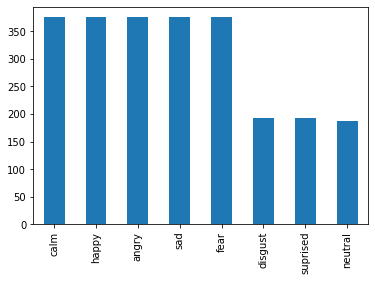

In [31]:
ravdess_df['emotion'].value_counts().plot(kind='bar')

In [32]:
ravdess_df.iloc[0]['path']

'/content/drive/MyDrive/datasets/speech/RAVDESS/data/03-01-01-01-01-01-18.wav'

In [33]:
Ravdess

'/content/drive/MyDrive/datasets/speech/RAVDESS/data'

## Find Maximum Padding of Samples for Padding Purposes

Normalize to +5.0 dBFS and transform to an array


In [34]:
# Maximum samples count for padding purposes.

sample_lengths = []

for subdir, dirs, files in os.walk(Ravdess):
  for file in tqdm(files): 
    current_path = os.path.join(subdir,file)
    x, sr = librosa.load(path = current_path, sr = None)
    xt, index = librosa.effects.trim(x, top_db=30)
    sample_lengths.append(len(xt))

print('Maximum sample length:', np.max(sample_lengths))

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 60/60 [00:16<00:00,  3.66it/s]
0it [00:00, ?it/s]
100%|██████████| 44/44 [00:10<00:00,  4.00it/s]
0it [00:00, ?it/s]
100%|██████████| 44/44 [00:11<00:00,  3.90it/s]

Maximum sample length: 243200


In [35]:
print('Maximum sample length:', np.max(sample_lengths))

Maximum sample length: 243200


In [36]:
# Maximum samples count for padding purposes.

sample_lengths = []

for subdir, dirs, files in os.walk(Ravdess):
  for file in tqdm(files): 
    current_path = os.path.join(subdir,file)
    rawsound = AudioSegment.from_file(current_path)
    normalizedsound = effects.normalize(rawsound, headroom = 0) 
    normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32') 
    xt, index = librosa.effects.trim(normal_x, top_db=30)
    sample_lengths.append(len(xt))

print('Maximum sample length:', np.max(sample_lengths))

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 60/60 [00:00<00:00, 112.42it/s]
0it [00:00, ?it/s]
100%|██████████| 44/44 [00:00<00:00, 100.68it/s]
0it [00:00, ?it/s]
100%|██████████| 44/44 [00:00<00:00, 96.76it/s] 

Maximum sample length: 267264


In [37]:
print('Maximum sample length:', np.max(sample_lengths))

Maximum sample length: 267264


Maximum sample length: 267264

## Processing audio files, extract features, prepare for feeding to model

**Steps:**

**1. Processing**
1. Loading The Audio files
2. Normalize to +5.0 dBFS and transform to an array
3. Trim Silence from the beginning and the end
4. Padding for having equal lenth
5. Noise Reduction

**2. Feature Extraction**
Extract the following features using *librosa*:
* MFCC
* RMS: Energy - Root Mean Square
* ZCR

**3. Adjust to 3D shape for RNN**
Map the processed format's shape, i.e., `input_shape` to `(batch, timesteps, feature)`
  
**4. Concatenate all features and store in files of X and Y (features and labels)**

**5. Create and Store Training, Validation and Test Files**



### 1. Processing & 2. Feature Extraction

In [38]:

# Initialize data lists
rms = []
zcr = []
mfcc = []
chroma = []
mel = []

emotions = []
#lens = []

# Initialize variables

# Computed previously 
total_length = 267264 
frame_length = 2048
hop_length = 512
raw_folder_path = Ravdess


for subdir, dirs, files in os.walk(raw_folder_path):
  for file in tqdm(files): 
    # Fetch the current file's directory
    current_path = os.path.join(subdir,file)

    # Fetch the sample rate.
    # "sr" denotes the sample rate. "_" is the signal but it is dismissed
    _, sr = librosa.load(path = current_path, sr = None) # sr (the sample rate) is used for librosa's MFCCs. '_' is irrelevant.
    # Load the audio file.
    rawsound = AudioSegment.from_file(current_path) 
    # Normalize the audio to +5.0 dBFS.
    normalizedsound = effects.normalize(rawsound, headroom = 0) 
    # Transform the normalized audio to np.array of samples.
    normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')
    # Trim silence from the beginning and the end.
    xt, index = librosa.effects.trim(normal_x, top_db=30)
    # Pad for duration equalization.
    padded_x = pad_sequences([xt], maxlen = total_length, padding='post', truncating='post', dtype='float32', value=0.0).reshape(-1,)
    # Noise reduction.
    final_x = nr.reduce_noise(padded_x, sr=sr)

    # Features extraction 
    f1 = librosa.feature.rms(final_x, frame_length=frame_length, hop_length=hop_length) # RMS
    f2 = librosa.feature.zero_crossing_rate(final_x , frame_length=frame_length, hop_length=hop_length, center=True) # ZCR      
    f3 = librosa.feature.mfcc(final_x, sr=sr, n_mfcc=13, hop_length = hop_length) # MFCC
    f4 = librosa.feature.chroma_stft(final_x, sr=sr, hop_length = hop_length) # Chroma
    f5 = librosa.feature.melspectrogram(final_x, sr=sr, hop_length = hop_length) # Mel Scale

    # Fetch the part of file that representes the emotion
    e_num = file[6:8] 
    # Fetch the emotion's label (number) using the encoding function we defined "emotionencode"
    # This would be our (multiclass) target that we aim at predicting
    e = emotionencode(e_num)
    # Fetch the emotion's label but this is only for our understanding and won't be added anywehere
    emotion = emotion_label(e)

                     

    # Storing features in their corresponding lists
    rms.append(f1)
    zcr.append(f2)
    mfcc.append(f3)
    #chroma.append(f4)
    #mel.append(f5)
    # Storing label
    emotions.append(e) 

toc = time.perf_counter()

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 60/60 [00:20<00:00,  2.87it/s]
0it [00:00, ?it/s]
100%|██████████| 44/44 [00:15<00:00,  2.79it/s]
0it [00:00, ?it/s]
100%|██████████| 44/44 [00:15<00:00,  2.84it/s]


In [39]:
print(f"Running time: {(toc - tic)/60:0.4f} minutes")

Running time: 28.2314 minutes


### 3. Adjust Shapes

In [40]:
# Convert to array
f_rms = np.asarray(rms).astype('float32')
f_zcr = np.asarray(zcr).astype('float32')
f_mfccs = np.asarray(mfcc).astype('float32')
#f_chroma = np.asarray(chroma).astype('float32')
#f_mel = np.asarray(mel).astype('float32')


In [41]:
f_rms.shape

(2452, 1, 523)

In [42]:
f_rms[0].shape

(1, 523)

In [43]:

# Adjusting features shape to the 3D format: (batch, timesteps, feature)
f_rms = np.swapaxes(f_rms,1,2)
f_zcr = np.swapaxes(f_zcr,1,2)
f_mfccs = np.swapaxes(f_mfccs,1,2)
#f_chroma = np.swapaxes(f_chroma,1,2)
#f_mel = np.swapaxes(f_mel,1,2)

print('ZCR shape:',f_zcr.shape)
print('RMS shape:',f_rms.shape)
print('MFCCs shape:',f_mfccs.shape)
#print('CHROMA shape:',f_chroma.shape)
#print('MEL shape:',f_mel.shape)

ZCR shape: (2452, 523, 1)
RMS shape: (2452, 523, 1)
MFCCs shape: (2452, 523, 13)


### 4. Concatenate all features and store files

In [44]:
# Concatenating all features to 'X' variable.
X = np.concatenate((f_zcr, f_rms, f_mfccs), axis=2)

# Preparing 'Y' as a 2D shaped variable.
Y = np.asarray(emotions).astype('int8')
Y = np.expand_dims(Y, axis=1)

In [45]:
X.shape

(2452, 523, 15)

In [46]:
Y.shape

(2452, 1)

In [47]:
X

array([[[ 2.15820312e-01,  1.44191132e+02,  5.13129395e+02, ...,
         -2.44437523e+01,  1.55276337e+01, -4.33476353e+00],
        [ 3.27148438e-01,  1.42330032e+02,  5.21900879e+02, ...,
         -2.54487381e+01,  1.62174683e+01, -4.54476738e+00],
        [ 4.49707031e-01,  1.02043091e+02,  4.93648315e+02, ...,
         -2.22616959e+01,  1.45588131e+01, -2.66312599e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  4.46680695e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  4.46680695e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  4.46680695e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 1.10351562e-01,  1.13982373e+03,  6.64951599e+02, ...,
         -9.57829094e+00,  6.43030930e+00, -4.04476833e+00],
        [ 1.20605469e-01,  1.19600208e+03,  8.06604431e+02, ...,
         -1.42437897e+01,  8.01480389e

In [48]:
Y

array([[0],
       [0],
       [0],
       ...,
       [4],
       [5],
       [5]], dtype=int8)

In [49]:
# Save X,Y arrays as lists to json files.

processed_path = Ravdess_processed

x_data = X.tolist() 

x_path = processed_path + "X_features.json" # FILE SAVE PATH
#x_path = '/content/drive/MyDrive/datasets/speech/RAVDESS/processedData/X_features.json'
dump(obj = x_data, fp = x_path)

y_data = Y.tolist() 
y_path =  processed_path + "Y_labels.json" # FILE SAVE PATH
dump(obj = y_data, fp = y_path)

'[[0], [0], [0], [0], [1], [1], [1], [2], [1], [2], [1], [1], [2], [1], [2], [2], [1], [2], [4], [2], [4], [3], [3], [3], [3], [3], [3], [2], [3], [3], [4], [5], [4], [5], [5], [4], [4], [4], [5], [4], [5], [6], [6], [6], [6], [6], [5], [5], [6], [6], [5], [6], [7], [7], [7], [7], [7], [7], [7], [7], [0], [0], [1], [0], [1], [2], [1], [1], [1], [1], [0], [1], [2], [1], [2], [3], [3], [2], [3], [2], [2], [3], [2], [3], [3], [3], [2], [4], [4], [4], [5], [4], [4], [4], [5], [5], [4], [5], [4], [3], [6], [6], [7], [6], [6], [5], [5], [6], [6], [5], [6], [6], [5], [7], [7], [7], [7], [7], [7], [7], [0], [0], [0], [1], [1], [2], [1], [1], [1], [1], [1], [2], [2], [2], [0], [1], [3], [2], [3], [2], [3], [3], [3], [3], [3], [3], [2], [2], [4], [4], [4], [5], [5], [4], [4], [5], [4], [4], [5], [5], [5], [5], [4], [7], [6], [7], [7], [6], [6], [6], [6], [5], [6], [6], [6], [7], [7], [7], [7], [7], [0], [1], [1], [1], [0], [0], [1], [1], [1], [1], [0], [3], [2], [2], [2], [2], [3], [3], [3], [2]

In [50]:
x_path

'/content/drive/MyDrive/datasets/speech/RAVDESS/processedData/X_features.json'

In [51]:
# Load X,Y json files back into lists, convert to np.arrays

X = load(x_path)
X = np.asarray(X, dtype = 'float32')

Y = load(y_path)
Y = np.asarray(Y, dtype = 'int8')

### 5. Create and Store Training, Validation and Test Files

In [52]:
# Split to train, validation, and test sets.
from sklearn.model_selection import train_test_split
x_train, x_tosplit, y_train, y_tosplit = train_test_split(X, Y, test_size = 0.125, random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_tosplit, y_tosplit, test_size = 0.304, random_state = 1)

#'One-hot' vectors for Y: emotion classification
y_train_class = tf.keras.utils.to_categorical(y_train, 8, dtype = 'int8')
y_val_class = tf.keras.utils.to_categorical(y_val, 8, dtype = 'int8')

In [53]:
# x_train, x_val, and x_test shape check.
print(np.shape(x_train))
print(np.shape(x_val))
print(np.shape(x_test))

(2145, 523, 15)
(213, 523, 15)
(94, 523, 15)


In [54]:
## shape of inputs for the LSTM model
x_train.shape[1:3]

(523, 15)

In [55]:
# y_train, y_val, and y_test shape check.
print(np.shape(y_train))
print(np.shape(y_val))
print(np.shape(y_test))

(2145, 1)
(213, 1)
(94, 1)


In [56]:
# Save x_test, y_test to JSON.

x_test_path = Ravdess_processed + 'x_test_data.json'
dump(obj = x_test, fp = x_test_path)

y_test_path = Ravdess_processed + 'y_test_data.json'
dump(obj = y_test, fp = y_test_path)

'{"__ndarray__": [[2], [2], [2], [0], [4], [6], [2], [0], [5], [0], [3], [5], [4], [1], [6], [4], [3], [5], [4], [5], [7], [1], [7], [1], [2], [5], [4], [5], [4], [1], [2], [1], [3], [3], [3], [3], [3], [3], [5], [1], [5], [2], [1], [6], [2], [1], [3], [6], [1], [5], [6], [7], [4], [2], [6], [4], [4], [5], [4], [4], [2], [3], [1], [7], [7], [1], [6], [4], [3], [7], [6], [2], [4], [6], [1], [0], [1], [2], [4], [5], [4], [3], [1], [4], [3], [6], [7], [7], [5], [7], [1], [2], [1], [4]], "dtype": "int8", "shape": [94, 1], "Corder": true}'